In [1]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
shp_file_name = "C:\\Users\\Arfe\\1161\\Data-Project\\Data_Project\\GDA2020\\nsw_localities.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = (
    "https://data.gov.au/data/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/89af4ef8-7d45-4535-be38-221025695900/download/nsw_loc_gda2020.zip"
)

def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
burbs.sample(2)


loading from file
done


,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,geometry
170,lcpto7waCuo54-4,loc1e24228ac15b,2022-12-14,Balranald,Gazetted Locality,NSW,"POLYGON ((143.368 -33.876, 143.367 -33.881, 14..."
372,lcp81bb7446b4ac,loc12b138c6dd1f,2021-06-24,Binjura,Gazetted Locality,NSW,"POLYGON ((149.100 -36.138, 149.101 -36.138, 14..."


In [4]:
if os.path.isfile("listings.csv"):
    filepath = "listings.csv"
    print("loading from file")
else:
    filepath = ""
    print("loading from the internet")

listing_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [5]:
def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

<Axes: >

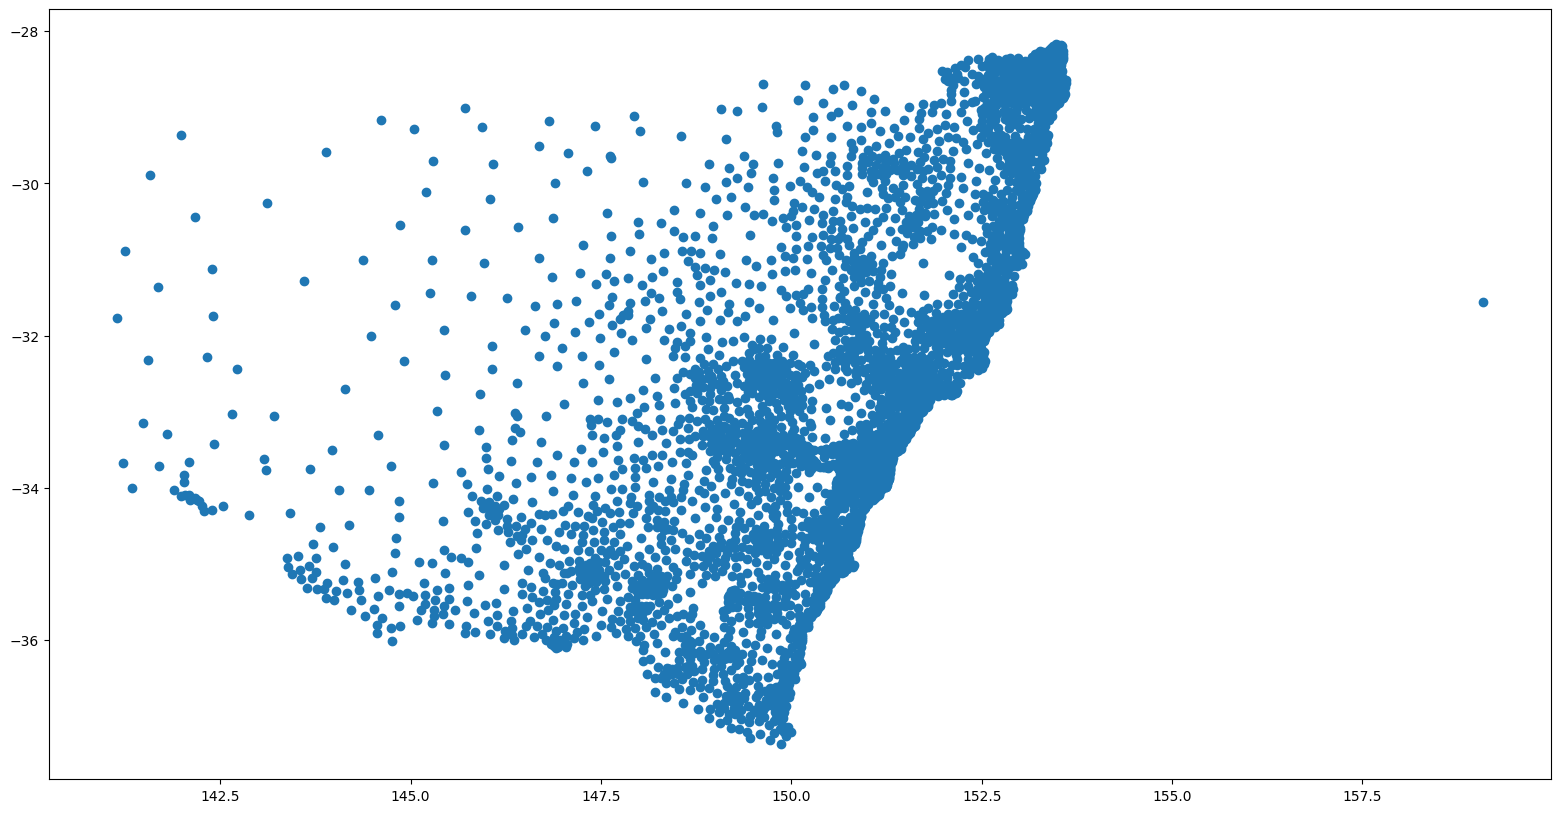

In [6]:
burbs.centroid.plot()

In [7]:
listing_data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4688422,https://www.airbnb.com/rooms/4688422,20230606052803,2023-06-06,city scrape,Rental unit in Manly · ★4.71 · 2 bedrooms · 3 ...,Attractive discounts offered for long term boo...,Once you get to Manly you won't want to leave ...,https://a0.muscache.com/pictures/airflow/Hosti...,13396297,...,4.97,4.94,4.65,PID-STRA-26284,t,1,1,0,0,0.35
1,39681254,https://www.airbnb.com/rooms/39681254,20230606052803,2023-06-06,previous scrape,Rental unit in Manly · ★5.0 · 1 bedroom · 1 be...,Lovely apartment with great views over Little ...,"Little Manly Beach and cafe at the doorstep, a...",https://a0.muscache.com/pictures/2552695c-1207...,25316226,...,5.00,5.00,5.00,NaN,t,1,1,0,0,0.07
2,43619457,https://www.airbnb.com/rooms/43619457,20230606052803,2023-06-06,previous scrape,Rental unit in Manly · 3 bedrooms · 3 beds · 2...,A stunning penthouse 3 bedroom 2 bathroom apar...,"Spoiled for lifestyle choices, step outside yo...",https://a0.muscache.com/pictures/2725ee7b-0098...,26816558,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
3,39446599,https://www.airbnb.com/rooms/39446599,20230606052803,2023-06-06,previous scrape,Guesthouse in Eastwood · 1 bedroom · 1 bed · 1...,This is a fully furnished independent flat att...,"The area is very handy close to restaurants, p...",https://a0.muscache.com/pictures/90cc2454-5a17...,152329169,...,NaN,NaN,NaN,PID-STRA-26166,f,1,1,0,0,NaN
4,43629106,https://www.airbnb.com/rooms/43629106,20230606052803,2023-06-06,city scrape,Rental unit in Manly · ★5.0 · 2 bedrooms · 4 b...,Freshly styled beachfront beauty. From its exc...,"Manly is uniquely placed, just across the harb...",https://a0.muscache.com/pictures/5aff4f53-ba67...,348372472,...,5.00,5.00,4.81,PID-STRA-10013,f,1,1,0,0,0.85


In [8]:
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

<Axes: >

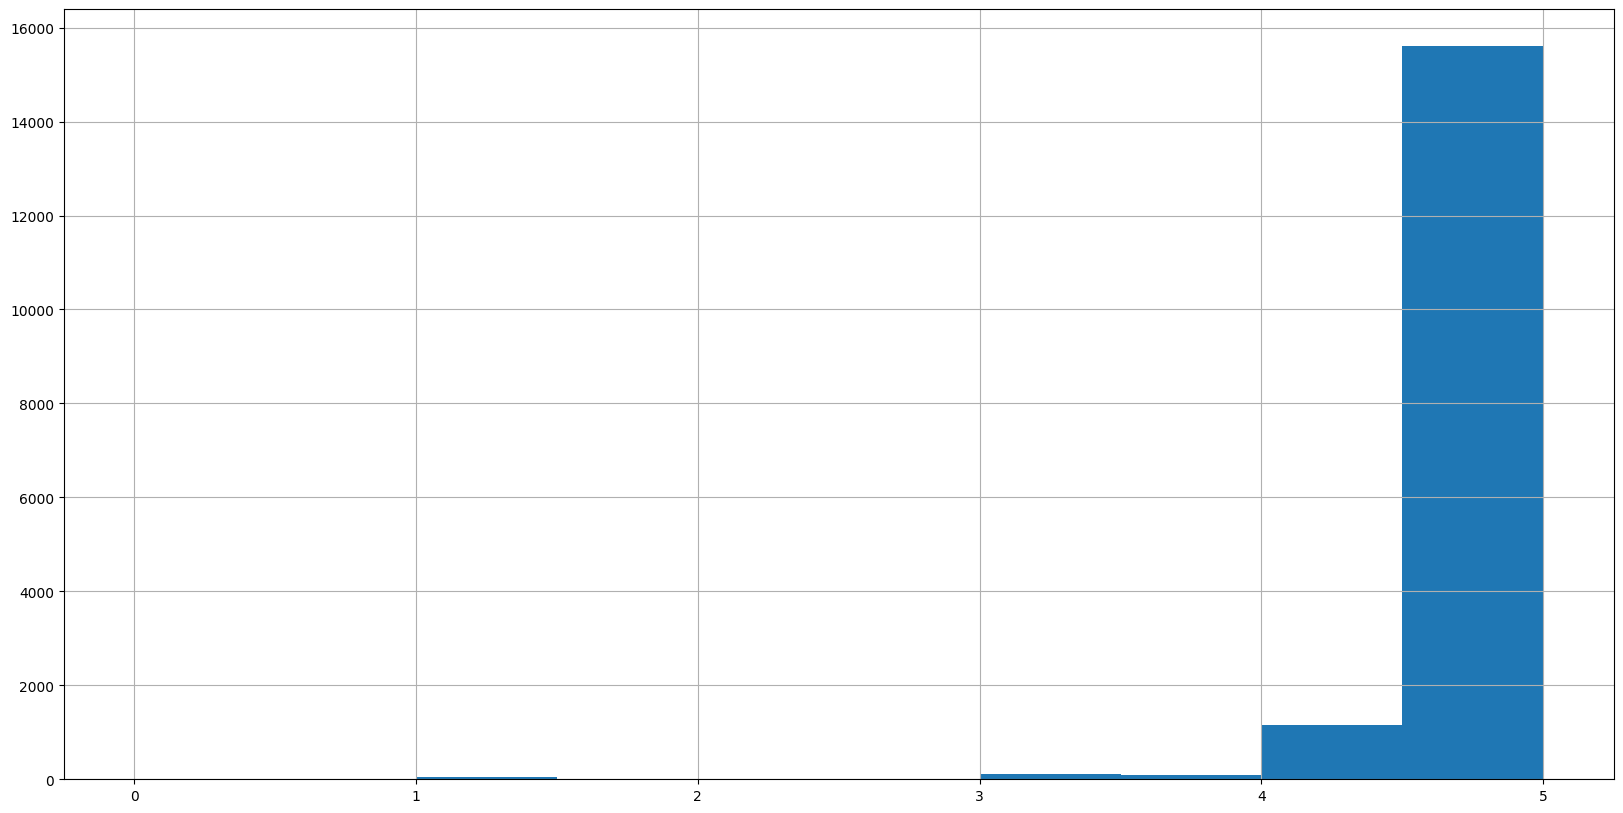

In [9]:
listing_data["review_scores_location"].hist()

<Axes: >

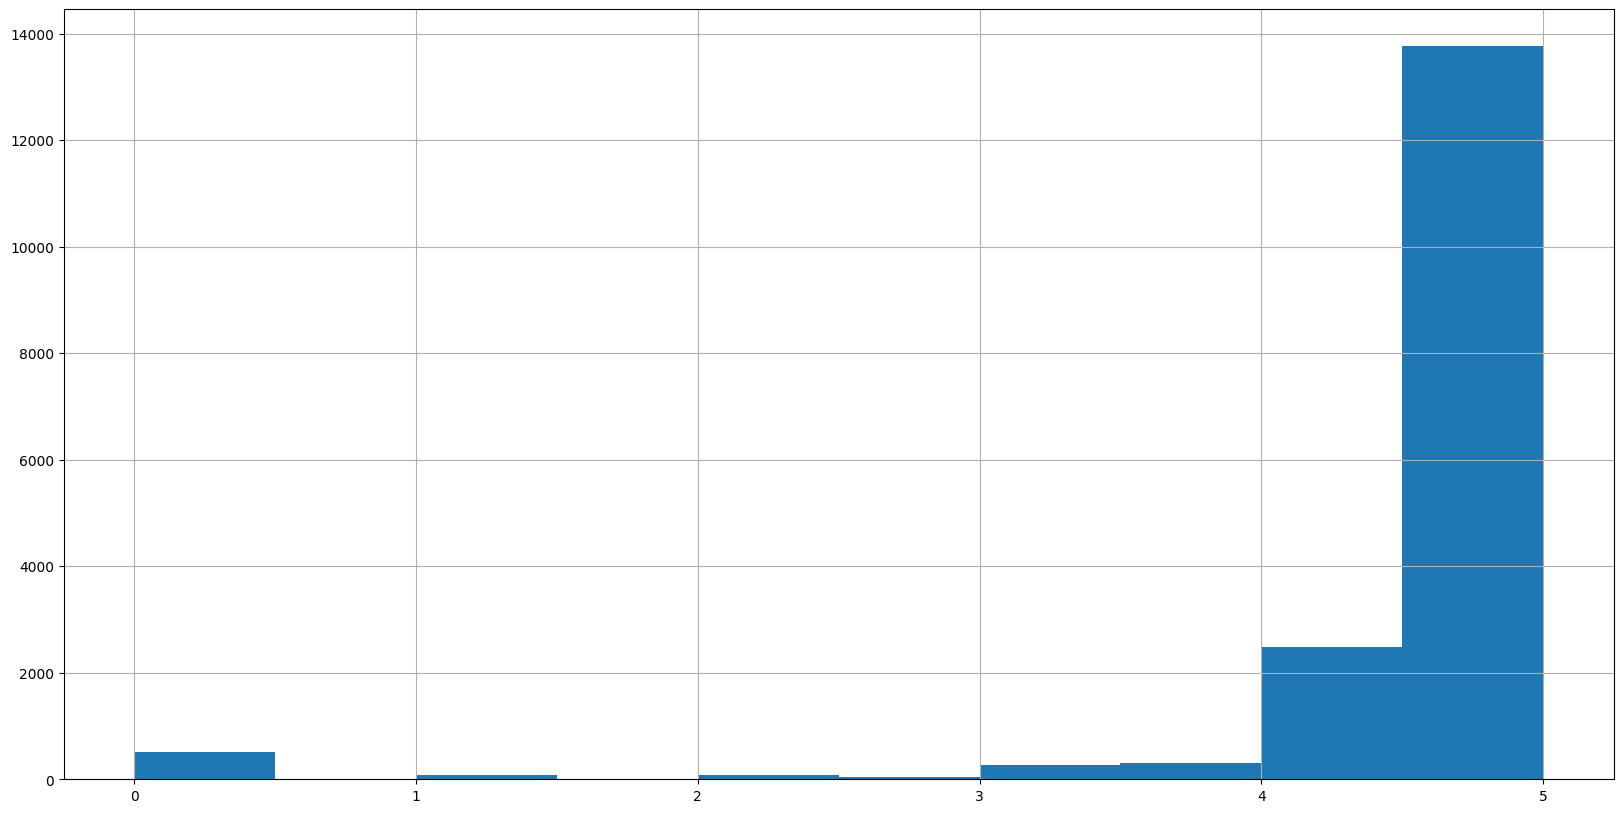

In [10]:
listing_data["review_scores_rating"].hist()

<Axes: >

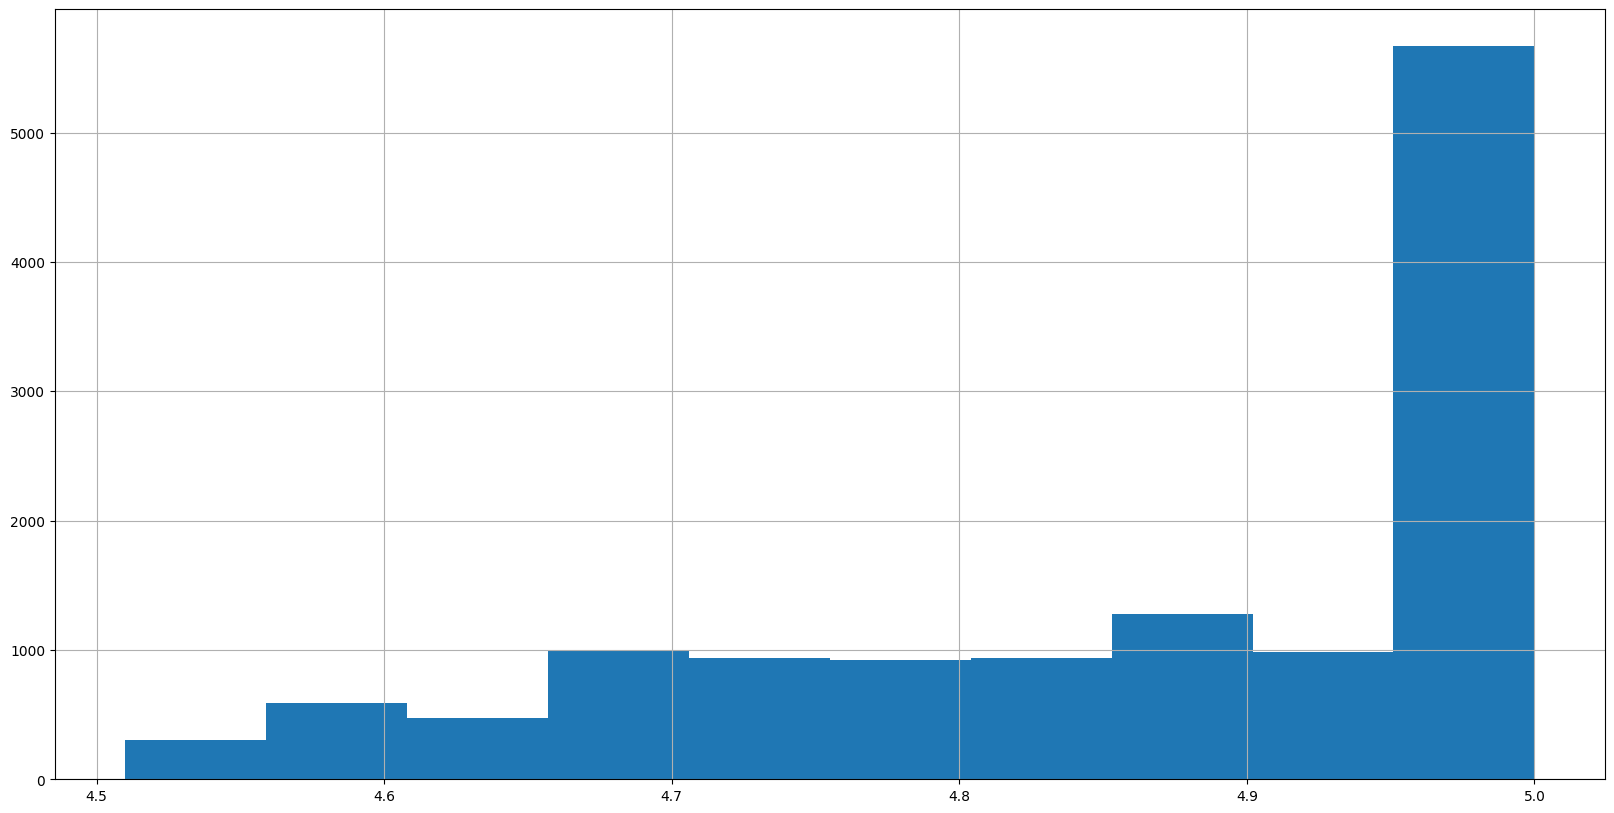

In [11]:
listing_data.review_scores_rating[listing_data.review_scores_rating > 4.5].hist()

<Axes: >

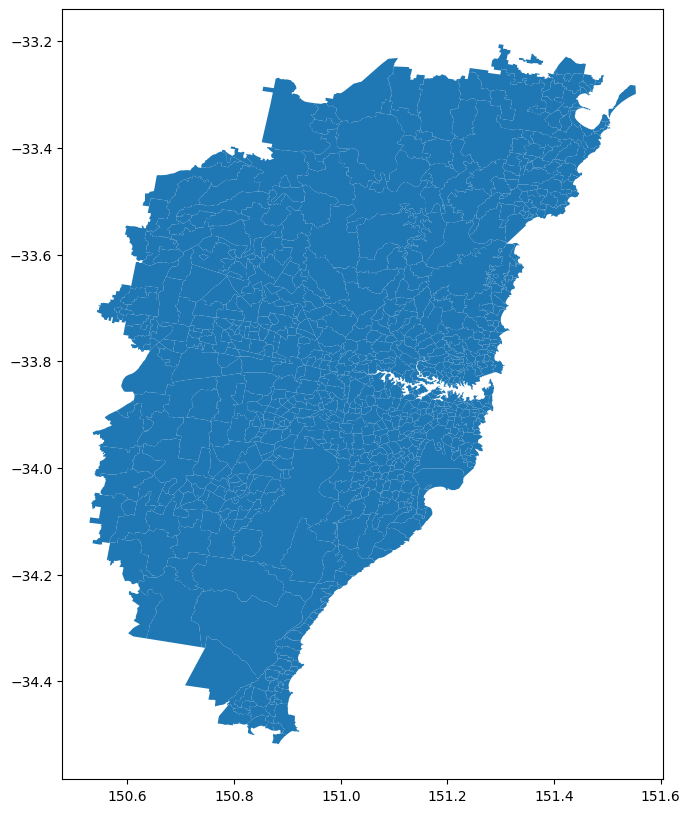

In [12]:
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
burbs["distance_from_UNSW"] = burbs.centroid.distance(right_here)

close_burbs = burbs[burbs.distance_from_UNSW < 0.7]
close_burbs.plot()


In [13]:
suburb = 'Parramatta'

burbs.LOC_NAME[burbs.LOC_NAME == suburb]




3220    Parramatta
Name: LOC_NAME, dtype: object

In [14]:
# what this does is it takes the listing CSV which we have, goes in there takes the Latitude and Longitude values, and it creates a new column called Geometry which is what Geopandas can interpret as a point on the map. The power of this is it did it automatically for all 20000+ rows
listing_data_geo = gp.GeoDataFrame(listing_data, geometry = gp.points_from_xy(listing_data.longitude,listing_data.latitude))

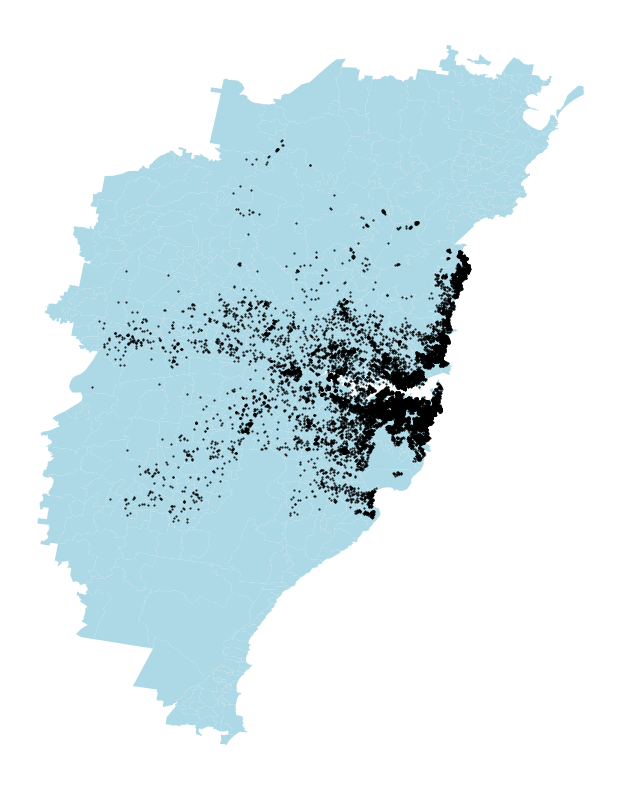

In [15]:
#this line plots and customises 'axis' which in this case is a copy of 'close_burbs'
axis = close_burbs.plot(
    color = 'lightblue', #edgecolor = 'white'
)

#this line plots and customsies the Airbnb listings on the existing map of Sydney
listing_data_geo.plot(ax = axis, color = 'black', markersize=0.25)

#this line takes out the lables
axis.set_axis_off()

quality of graphs,
quality of code,
quality of presentation,
quality of insights.


In [16]:
burbs.crs

<Projected CRS: EPSG:5234>
Name: Kandawala / Sri Lanka Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Sri Lanka - onshore.
- bounds: (79.64, 5.86, 81.95, 9.88)
Coordinate Operation:
- name: Sri Lanka Grid
- method: Transverse Mercator
Datum: Kandawala
- Ellipsoid: Everest 1830 (1937 Adjustment)
- Prime Meridian: Greenwich

In [17]:
#listing_data_geo.to_crs(burbs.crs, inplace=True)

listing_data_geo.set_crs(epsg=5234, inplace=True, allow_override=True)

listing_data_geo.sample(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
6248,19478392,https://www.airbnb.com/rooms/19478392,20230606052803,2023-06-06,city scrape,Rental unit in Chippendale · ★4.85 · 1 bedroom...,"Big studio close to famous Sydney University, ...","Extremely easy access to local shops, restaura...",https://a0.muscache.com/pictures/388f36d6-66f5...,6768173,...,4.86,4.75,PID-STRA-19702,f,3,3,0,0,0.82,POINT (151.198 -33.889)
5661,17737748,https://www.airbnb.com/rooms/17737748,20230606052803,2023-06-06,previous scrape,Rental unit in North Bondi · 1 bedroom · 1 bed...,Hi there! We live in a recently-renovated 2-be...,North Bondi is amazing! It's just removed from...,https://a0.muscache.com/pictures/ccc30ca4-31f3...,20019763,...,5.00,5.00,NaN,f,1,0,1,0,0.03,POINT (151.283 -33.887)


In [18]:
states_with_listings = gp.sjoin(listing_data_geo, close_burbs, how='inner', predicate='within')

In [19]:
states_with_listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,geometry,index_right,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,centroid,distance_from_UNSW
0,4688422,https://www.airbnb.com/rooms/4688422,20230606052803,2023-06-06,city scrape,Rental unit in Manly · ★4.71 · 2 bedrooms · 3 ...,Attractive discounts offered for long term boo...,Once you get to Manly you won't want to leave ...,https://a0.muscache.com/pictures/airflow/Hosti...,13396297,...,POINT (151.284 -33.806),2528,lcpffdcd390c11e,locc848a1816ac7,2021-12-13,Manly,Gazetted Locality,NSW,POINT (151.29111 -33.80476),0.128581
1,39681254,https://www.airbnb.com/rooms/39681254,20230606052803,2023-06-06,previous scrape,Rental unit in Manly · ★5.0 · 1 bedroom · 1 be...,Lovely apartment with great views over Little ...,"Little Manly Beach and cafe at the doorstep, a...",https://a0.muscache.com/pictures/2552695c-1207...,25316226,...,POINT (151.289 -33.805),2528,lcpffdcd390c11e,locc848a1816ac7,2021-12-13,Manly,Gazetted Locality,NSW,POINT (151.29111 -33.80476),0.128581
2,43619457,https://www.airbnb.com/rooms/43619457,20230606052803,2023-06-06,previous scrape,Rental unit in Manly · 3 bedrooms · 3 beds · 2...,A stunning penthouse 3 bedroom 2 bathroom apar...,"Spoiled for lifestyle choices, step outside yo...",https://a0.muscache.com/pictures/2725ee7b-0098...,26816558,...,POINT (151.285 -33.795),2528,lcpffdcd390c11e,locc848a1816ac7,2021-12-13,Manly,Gazetted Locality,NSW,POINT (151.29111 -33.80476),0.128581
4,43629106,https://www.airbnb.com/rooms/43629106,20230606052803,2023-06-06,city scrape,Rental unit in Manly · ★5.0 · 2 bedrooms · 4 b...,Freshly styled beachfront beauty. From its exc...,"Manly is uniquely placed, just across the harb...",https://a0.muscache.com/pictures/5aff4f53-ba67...,348372472,...,POINT (151.287 -33.791),2528,lcpffdcd390c11e,locc848a1816ac7,2021-12-13,Manly,Gazetted Locality,NSW,POINT (151.29111 -33.80476),0.128581
5,43628597,https://www.airbnb.com/rooms/43628597,20230606052803,2023-06-06,previous scrape,Rental unit in Manly · 3 bedrooms · 3 beds · 2...,Panoramic views to the horizon and an absolute...,You are perched right on the best Marine Reser...,https://a0.muscache.com/pictures/3c66015a-4c08...,297977860,...,POINT (151.295 -33.802),2528,lcpffdcd390c11e,locc848a1816ac7,2021-12-13,Manly,Gazetted Locality,NSW,POINT (151.29111 -33.80476),0.128581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23222,898987662392765697,https://www.airbnb.com/rooms/898987662392765697,20230606052803,2023-06-06,city scrape,Home in Glen Alpine · ★New · Studio · 2 beds ·...,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,163651360,...,POINT (150.783 -34.097),48,lcp84820a8c09b1,loc1f7067191f23,2021-06-24,Ambarvale,Gazetted Locality,NSW,POINT (150.79719 -34.08926),0.465484
22704,875888509627165682,https://www.airbnb.com/rooms/875888509627165682,20230606052803,2023-06-06,city scrape,Rental unit in Sadleir · ★New · 1 bedroom · 1 ...,You'll have a great time at this comfortable p...,This is separate unit at the back has shared 1...,https://a0.muscache.com/pictures/d9657237-8f88...,229156319,...,POINT (150.893 -33.916),3529,lcp8fef56e797d1,loc2fe02e601d2e,2022-03-11,Sadleir,Gazetted Locality,NSW,POINT (150.89094 -33.91711),0.339038
23013,879509753453282843,https://www.airbnb.com/rooms/879509753453282843,20230606052803,2023-06-06,city scrape,Guesthouse in Grasmere · ★New · Studio · 1 bed...,"Whether your coming to Camden for a wedding, a...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,2710982,...,POINT (150.666 -34.057),1780,lcped3297b7800b,locfb080c105e87,2021-06-24,Grasmere,Gazetted Locality,NSW,POINT (150.67060 -34.05778),0.576603
23077,888903777701986857,https://www.airbnb.com/rooms/888903777701986857,20230606052803,2023-06-06,city scrape,Home in Cecil Park · ★New · 9 bedrooms · 11 be...,When it comes to large and luxuriou

In [20]:


states_with_listings.LOC_NAME[states_with_listings.LOC_NAME == 'Darlinghurst'].value_counts()


LOC_NAME
Darlinghurst    498
Name: count, dtype: int64

<Axes: xlabel='LOC_NAME'>

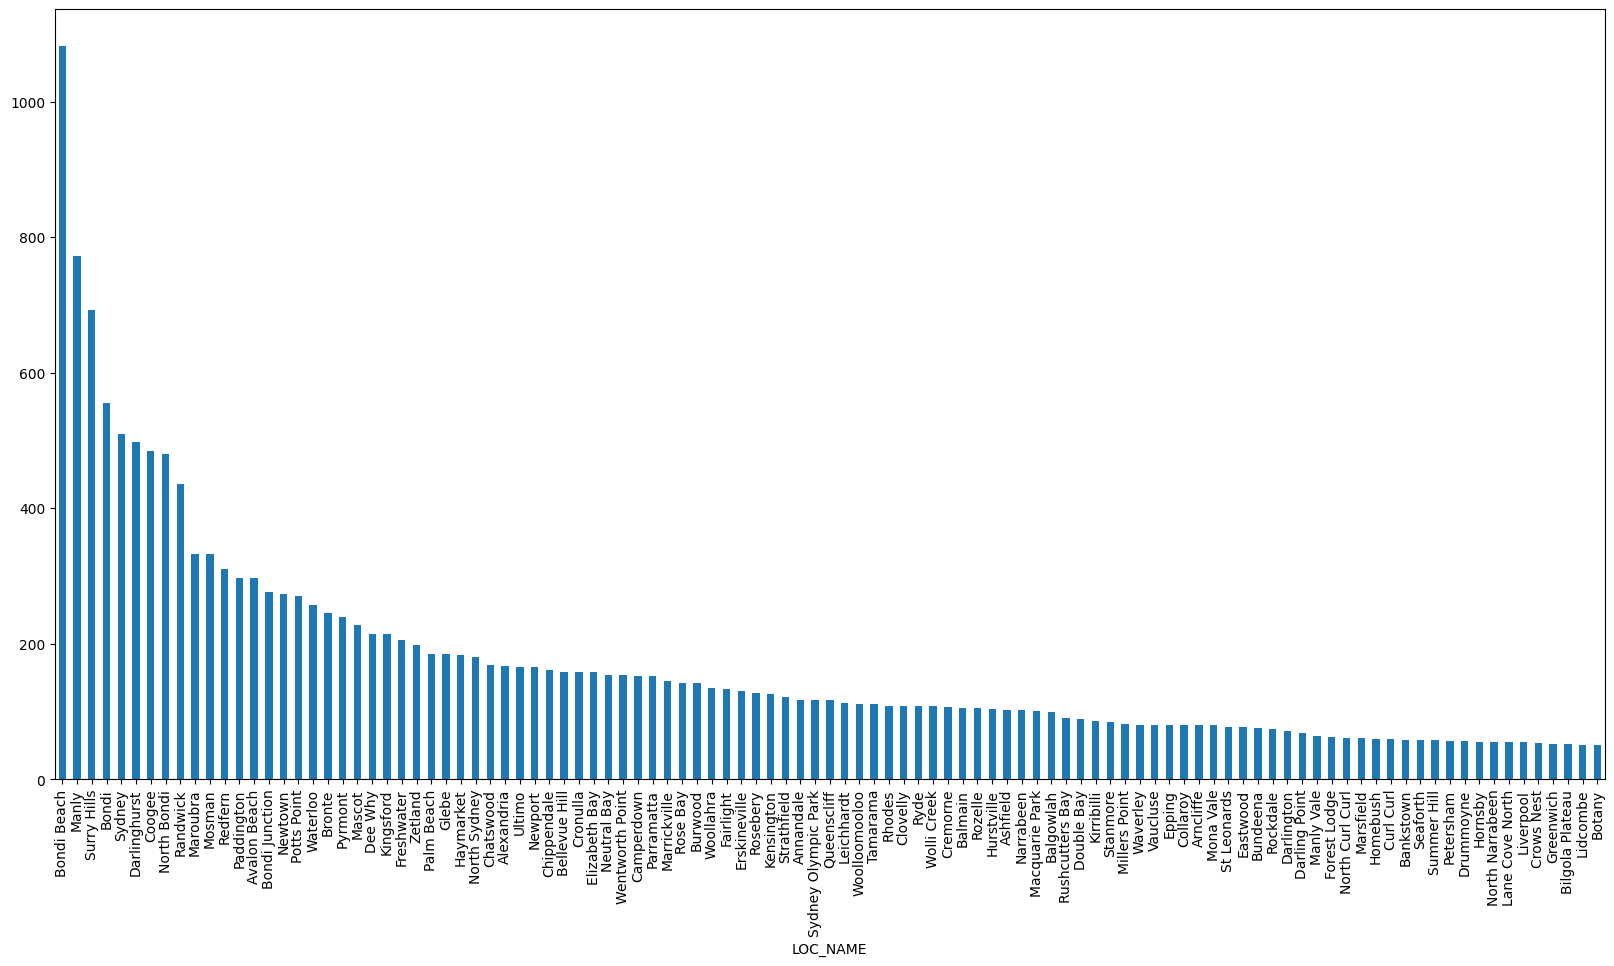

In [21]:
states_with_listings.LOC_NAME.value_counts()[states_with_listings.LOC_NAME.value_counts() > 50].plot(kind="bar")



In [22]:
states_with_listings.value_counts("LOC_NAME")

LOC_NAME
Bondi Beach        1082
Manly               773
Surry Hills         693
Bondi               556
Sydney              509
                   ... 
Maraylya              1
Bow Bowing            1
Sylvania Waters       1
Menai                 1
Abbotsbury            1
Name: count, Length: 582, dtype: int64

In [23]:
# counts how many unique elements there are in a list in this case, how many suburbs have an airbnbn listing
states_with_listings.LOC_NAME.nunique()

582

In [24]:
states_with_listings.LOC_NAME.count()

23441

In [25]:
listing_data.neighbourhood.value_counts()

neighbourhood
Bondi Beach, New South Wales, Australia               650
Surry Hills, New South Wales, Australia               493
Manly, New South Wales, Australia                     457
Sydney, New South Wales, Australia                    351
Darlinghurst, New South Wales, Australia              309
                                                     ... 
Waverton, North Sydney, New South Wales, Australia      1
Ashfield , New South Wales, Australia                   1
Cabarita, New South Wales, Australia                    1
Glebe, Nsw, Australia                                   1
Huntleys Cove, New South Wales, Australia               1
Name: count, Length: 655, dtype: int64

Text(0.5, 1.0, 'Airbnb Locations in Bondi Beach')

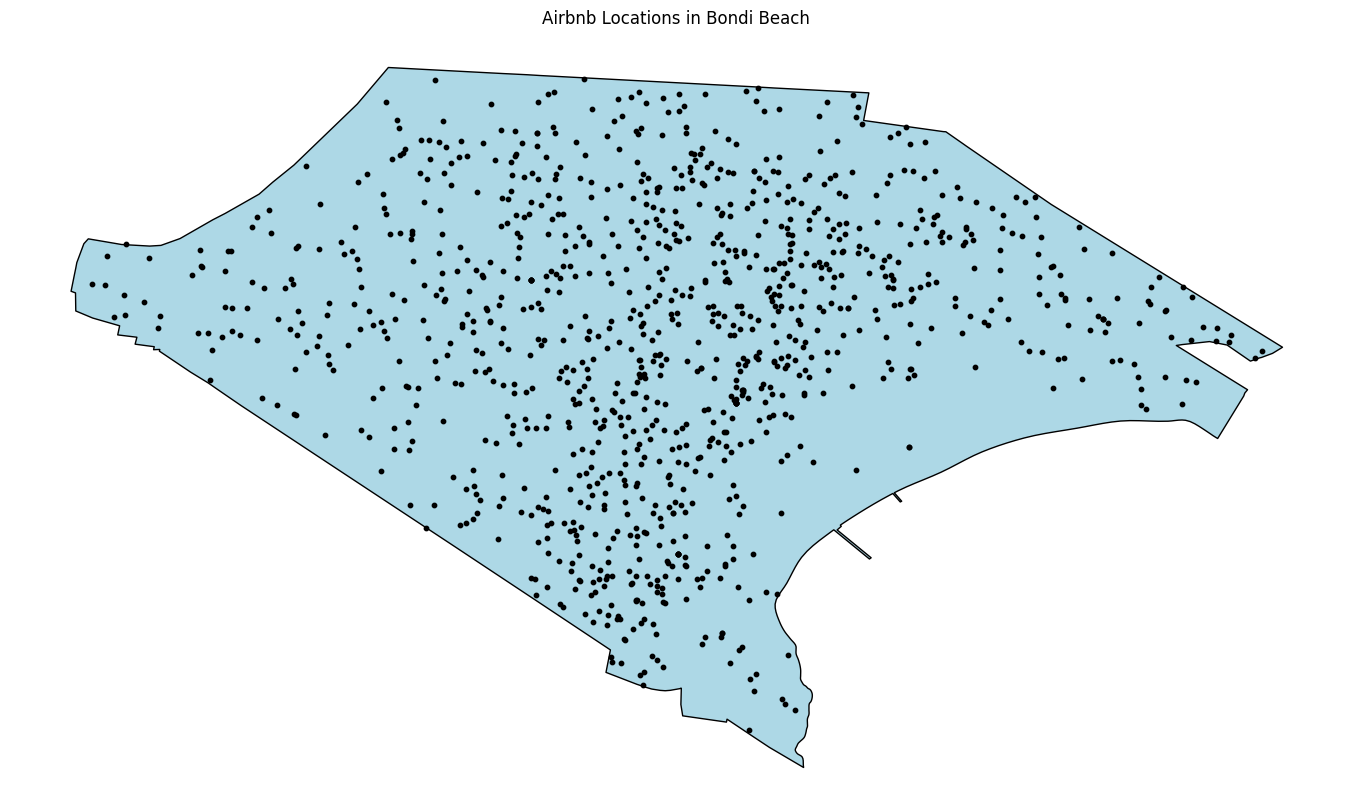

In [26]:
axis = burbs[burbs.LOC_NAME == "Bondi Beach"].plot(color = 'lightblue',  edgecolor = 'black')

states_with_listings[states_with_listings.LOC_NAME == 'Bondi Beach'].plot(ax = axis, color = 'black', markersize=10)

axis.set_axis_off()

plt.title("Airbnb Locations in Bondi Beach")

In [27]:
close_burbs["amount"] = states_with_listings.LOC_NAME.value_counts()

C:\Users\Arfe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [30]:
close_burbs

,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,geometry,centroid,distance_from_UNSW,amount
1,lcp17fc6b0c3f1e,loc826143633965,2022-09-28,Abbotsbury,Gazetted Locality,NSW,"POLYGON ((150.873 -33.860, 150.873 -33.861, 15...",POINT (150.86117 -33.87008),0.371882,NaN
2,lcpjL9UYhp-r6Ki,loc1e88f57cf9b1,2023-03-21,Abbotsford,Gazetted Locality,NSW,"POLYGON ((151.130 -33.844, 151.130 -33.844, 15...",POINT (151.12929 -33.85060),0.121092,NaN
13,lcp2baddd8b9123,loc92cd87112ce0,2021-06-24,Acacia Gardens,Gazetted Locality,NSW,"POLYGON ((150.918 -33.730, 150.918 -33.730, 15...",POINT (150.91379 -33.73350),0.366008,NaN
20,lcpc4a7d3f648c3,loc38a2e3f5b5e4,2021-12-03,Agnes Banks,Gazetted Locality,NSW,"POLYGON ((150.720 -33.588, 150.724 -33.592, 15...",POINT (150.70272 -33.62308),0.604068,NaN
21,lcpHOH9O1t-K6rC,locd61782fda373,2023-03-21,Airds,Gazetted Locality,NSW,"POLYGON ((150.845 -34.077, 150.845 -34.079, 15...",POINT (150.83314 -34.08597),0.430967,NaN
...,...,...,...,...,...,...,...,...,...,...
4582,lcp83a18bd34a9a,locfaa0dadf1aeb,2021-12-03,Yellow Rock,Gazetted Locality,NSW,"POLYGON ((150.655 -33.670, 150.654 -33.673, 15...",POINT (150.63391 -33.69616),0.635960,NaN
4583,lcp534d4c37ecd8,loc78b3955b736c,2022-07-04,Yenabilli,Gazetted Locality,NSW,"POLYGON ((151.080 -34.127, 151.080 -34.126, 15...",POINT (151.09111 -34.09810),0.227519,NaN
4586,lcpf0b979572a7d,loc15bb9865482a,2021-09-08,Yennora,Gazetted Locality,NSW,"POLYGON ((150.967 -33.855, 150.969 -33.855, 15...",POINT (150.96824 -33.86183),0.267671,NaN
4599,lcpvI4LiLLSjRye,loc82fe21aa5c78,2023-03-21,Yowie Bay,Gazetted Locality,NSW,"POLYGON ((151.106 -34.042, 151.106 -34.042, 15...",POINT (151.10283 -34.05074),0.183901,NaN


In [29]:
states_with_listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,geometry,index_right,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,centroid,distance_from_UNSW
0,4688422,https://www.airbnb.com/rooms/4688422,20230606052803,2023-06-06,city scrape,Rental unit in Manly · ★4.71 · 2 bedrooms · 3 ...,Attractive discounts offered for long term boo...,Once you get to Manly you won't want to leave ...,https://a0.muscache.com/pictures/airflow/Hosti...,13396297,...,POINT (151.284 -33.806),2528,lcpffdcd390c11e,locc848a1816ac7,2021-12-13,Manly,Gazetted Locality,NSW,POINT (151.29111 -33.80476),0.128581
1,39681254,https://www.airbnb.com/rooms/39681254,20230606052803,2023-06-06,previous scrape,Rental unit in Manly · ★5.0 · 1 bedroom · 1 be...,Lovely apartment with great views over Little ...,"Little Manly Beach and cafe at the doorstep, a...",https://a0.muscache.com/pictures/2552695c-1207...,25316226,...,POINT (151.289 -33.805),2528,lcpffdcd390c11e,locc848a1816ac7,2021-12-13,Manly,Gazetted Locality,NSW,POINT (151.29111 -33.80476),0.128581
2,43619457,https://www.airbnb.com/rooms/43619457,20230606052803,2023-06-06,previous scrape,Rental unit in Manly · 3 bedrooms · 3 beds · 2...,A stunning penthouse 3 bedroom 2 bathroom apar...,"Spoiled for lifestyle choices, step outside yo...",https://a0.muscache.com/pictures/2725ee7b-0098...,26816558,...,POINT (151.285 -33.795),2528,lcpffdcd390c11e,locc848a1816ac7,2021-12-13,Manly,Gazetted Locality,NSW,POINT (151.29111 -33.80476),0.128581
4,43629106,https://www.airbnb.com/rooms/43629106,20230606052803,2023-06-06,city scrape,Rental unit in Manly · ★5.0 · 2 bedrooms · 4 b...,Freshly styled beachfront beauty. From its exc...,"Manly is uniquely placed, just across the harb...",https://a0.muscache.com/pictures/5aff4f53-ba67...,348372472,...,POINT (151.287 -33.791),2528,lcpffdcd390c11e,locc848a1816ac7,2021-12-13,Manly,Gazetted Locality,NSW,POINT (151.29111 -33.80476),0.128581
5,43628597,https://www.airbnb.com/rooms/43628597,20230606052803,2023-06-06,previous scrape,Rental unit in Manly · 3 bedrooms · 3 beds · 2...,Panoramic views to the horizon and an absolute...,You are perched right on the best Marine Reser...,https://a0.muscache.com/pictures/3c66015a-4c08...,297977860,...,POINT (151.295 -33.802),2528,lcpffdcd390c11e,locc848a1816ac7,2021-12-13,Manly,Gazetted Locality,NSW,POINT (151.29111 -33.80476),0.128581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23222,898987662392765697,https://www.airbnb.com/rooms/898987662392765697,20230606052803,2023-06-06,city scrape,Home in Glen Alpine · ★New · Studio · 2 beds ·...,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,163651360,...,POINT (150.783 -34.097),48,lcp84820a8c09b1,loc1f7067191f23,2021-06-24,Ambarvale,Gazetted Locality,NSW,POINT (150.79719 -34.08926),0.465484
22704,875888509627165682,https://www.airbnb.com/rooms/875888509627165682,20230606052803,2023-06-06,city scrape,Rental unit in Sadleir · ★New · 1 bedroom · 1 ...,You'll have a great time at this comfortable p...,This is separate unit at the back has shared 1...,https://a0.muscache.com/pictures/d9657237-8f88...,229156319,...,POINT (150.893 -33.916),3529,lcp8fef56e797d1,loc2fe02e601d2e,2022-03-11,Sadleir,Gazetted Locality,NSW,POINT (150.89094 -33.91711),0.339038
23013,879509753453282843,https://www.airbnb.com/rooms/879509753453282843,20230606052803,2023-06-06,city scrape,Guesthouse in Grasmere · ★New · Studio · 1 bed...,"Whether your coming to Camden for a wedding, a...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,2710982,...,POINT (150.666 -34.057),1780,lcped3297b7800b,locfb080c105e87,2021-06-24,Grasmere,Gazetted Locality,NSW,POINT (150.67060 -34.05778),0.576603
23077,888903777701986857,https://www.airbnb.com/rooms/888903777701986857,20230606052803,2023-06-06,city scrape,Home in Cecil Park · ★New · 9 bedrooms · 11 be...,When it comes to large and luxuriou